In [1]:
import pandas as pd
import cv2 as cv
import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.utils import io

In [2]:
data = pd.read_csv('data/hands/Training/Yoel Raz/Yoel636760923490742912Sync.csv')

In [3]:
data.describe()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
count,2250.000000,2250.000000,2250.0,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,...,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
mean,727.122775,56767.042222,1.0,-110.747430,215.973153,12.787881,-0.328205,0.702827,0.132305,0.928687,...,0.882425,-153.787186,170.518977,34.471439,-328.076899,13.085639,114.469127,0.098198,0.718758,0.081878
std,21.648291,1852.691592,0.0,46.245986,45.745889,44.262478,200.000086,232.007363,188.139860,0.439786,...,0.524757,36.360861,44.187277,33.478927,51.026962,68.564439,29.010022,0.245084,0.773710,0.204555
min,689.648600,53431.000000,1.0,-230.805600,92.434430,-103.503200,-898.097100,-1185.449000,-1163.047000,-1.105056,...,-3.004622,-249.974100,77.997060,-51.061890,-432.519500,-111.282600,35.900420,0.000000,0.000000,0.000000
25%,708.386225,55216.000000,1.0,-142.448675,191.204775,-17.904855,-87.079278,-80.269452,-79.014700,0.670716,...,0.711473,-177.636625,144.048200,10.932055,-366.433625,-27.506180,96.988007,0.000000,0.138641,0.000000
50%,727.122600,56740.000000,1.0,-109.485150,212.957950,12.055365,-4.198942,4.458742,0.671669,1.010681,...,0.968498,-158.050200,165.255100,35.223485,-335.721500,5.794230,114.263600,0.000000,0.401110,0.000000
75%,745.858500,58310.250000,1.0,-81.636435,237.407125,39.983263,83.018783,100.593950,82.428443,1.216489,...,1.188675,-133.239225,187.588625,55.426255,-294.221625,37.004875,134.943350,0.000000,1.164475,0.000000
max,764.591300,59991.000000,1.0,22.898000,392.182800,159.560800,1010.796000,1008.848000,716.825700,2.420553,...,3.129452,-42.163410,340.702700,148.777800,-89.977480,420.124600,214.369900,1.000000,3.141593,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             2250 non-null   float64
 1    Frame ID        2250 non-null   int64  
 2    Hand Type       2250 non-null   object 
 3    # hands         2250 non-null   int64  
 4    Position X      2250 non-null   float64
 5    Position Y      2250 non-null   float64
 6    Position Z      2250 non-null   float64
 7    Velocity X      2250 non-null   float64
 8    Velocity Y      2250 non-null   float64
 9    Velocity Z      2250 non-null   float64
 10   Pitch           2250 non-null   float64
 11   Roll            2250 non-null   float64
 12   Yaw             2250 non-null   float64
 13   Wrist Pos X     2250 non-null   float64
 14   Wrist Pos Y     2250 non-null   float64
 15   Wrist Pos Z     2250 non-null   float64
 16   Elbow pos X     2250 non-null   float64
 17   Elbow Pos Y  

In [22]:
grab = data.iloc[:,4:10]

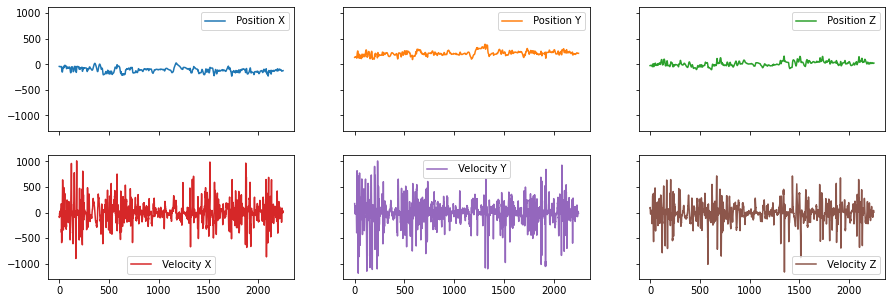

In [23]:
grab.plot(figsize=(15,5),subplots=True , layout=(2,3),sharey= True)
plt.show()